<a href="https://colab.research.google.com/github/saurav2sengupta/learnML/blob/master/fashion_mnist_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Import basic Python libraries
import numpy as np
import pandas as pd
import time
import random
import matplotlib.pyplot as plt
 
%matplotlib inline

In [2]:
from keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

print("Shape of x_train {}".format(x_train.shape))
print("Shape of y_train {}".format(y_train.shape))
print("Shape of x_test {}".format(x_test.shape))
print("Shape of y_test {}".format(y_test.shape))


Using TensorFlow backend.


4423680/4422102 [==============================] - 1s 0us/step
Shape of x_train (60000, 28, 28)
Shape of y_train (60000,)
Shape of x_test (10000, 28, 28)
Shape of y_test (10000,)


In [3]:
labelNames = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", 
              "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [4]:
# Normalize the data
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255.0
x_test /= 255.0

In [5]:
#Reshape the train and test sets into two dimensional matrix
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1] * x_train.shape[2])
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1] * x_test.shape[2])

print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [ ]:
#Import classic ML models
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
"""
# SVM Model
start1 = time.time()
svc = SVC(C=1, kernel='linear', gamma="auto")
svc.fit(x_train, y_train)
end1 = time.time()
svm_time = end1 - start1
"""

# KNN Model
start2 = time.time()
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)
#y_pred_knn = knn.predict(x_test)
end2 = time.time()
knn_time = end2 - start2

# Random Forest
start3 = time.time()
random_forest = RandomForestClassifier(criterion='entropy', max_depth=70, 
                                       n_estimators=100)
random_forest.fit(x_train, y_train)
end3 = time.time()
forest_time = end3 - start3

# Decision Tree
start4 = time.time()
tree = DecisionTreeClassifier(max_depth=100, criterion='entropy')
tree.fit(x_train, y_train)
end4 = time.time()
tree_time = end4 - start4

#print("SVM Time: {:0.2f} minute".format(svm_time/60.0))
print("KNN Time: {:0.2f} minute".format(knn_time/60.0))
print("Random Forest Time: {:0.2f} minute".format(forest_time/60.0))
print("Decision Tree Time: {:0.2f} minute".format(tree_time/60.0))

KNN Time: 0.20 minute
Random Forest Time: 2.10 minute
Decision Tree Time: 0.76 minute


In [ ]:
#Check the accuracy for each of the above ML models
from sklearn import metrics

# KNN report and analysis
y_pred_knn = knn.predict(x_test)

knn_f1 = metrics.f1_score(y_test, y_pred_knn, average= "weighted")
knn_accuracy = metrics.accuracy_score(y_test, y_pred_knn)
#knn_cm = metrics.confusion_matrix(y_test, y_pred_knn)

In [ ]:
print("-----------------K-nearest neighbors Report---------------")
print("F1 score: {}".format(knn_f1))
print("Accuracy score: {}".format(knn_accuracy))

-----------------K-nearest neighbors Report---------------
F1 score: 0.8546439722018904
Accuracy score: 0.8554


In [ ]:
# Random Forest report and analysis
y_pred_forest = random_forest.predict(x_test)
random_forest_f1 = metrics.f1_score(y_test, y_pred_forest, average= "weighted"
)
random_forest_accuracy = metrics.accuracy_score(y_test, y_pred_forest)

In [ ]:
print("-----------------Random Forest Report---------------")
print("F1 score: {}".format(random_forest_f1))
print("Accuracy score: {}".format(random_forest_accuracy))

-----------------Random Forest Report---------------
F1 score: 0.8760242660853803
Accuracy score: 0.8776


In [ ]:
# Decision Tree report and analysis
y_pred_tree = tree.predict(x_test)
tree_f1 = metrics.f1_score(y_test, y_pred_tree, average= "weighted")
tree_accuracy = metrics.accuracy_score(y_test, y_pred_tree)

print("-----------------Decision Tree Report---------------")
print("F1 score: {}".format(tree_f1))
print("Accuracy score: {}".format(tree_accuracy))

-----------------Decision Tree Report---------------
F1 score: 0.8014683836996909
Accuracy score: 0.8007


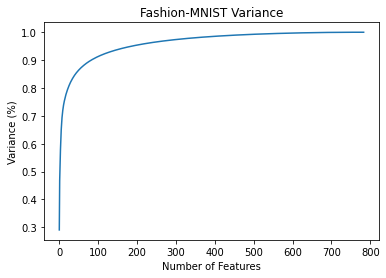

In [6]:
#Using PCA on the training data
from sklearn.decomposition import PCA

# fit the PCA with the training data
pca = PCA().fit(x_train)

# Plot the cumulative sum of eigenvalues
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Features')
plt.ylabel('Variance (%)') #for each component
plt.title('Fashion-MNIST Variance')
plt.show()

In [7]:
#The Variance graph showed that by using around 340 features, 
#we can retain approximately 96% of the data

pca = PCA(n_components=340)
pca.fit(x_train)

PCA(copy=True, iterated_power='auto', n_components=340, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [8]:
x_train_pca = pca.transform(x_train)
x_test_pca = pca.transform(x_test)

In [9]:
x_train_pca.shape

(60000, 340)

In [11]:
#Import classic ML models
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [12]:
#Apply classic ML models on the new PCA sets

"""
# SVM Model
start1 = time.time()
svc = SVC(C=1, kernel='linear', gamma="auto")
svc.fit(x_train_pca, y_train)
end1 = time.time()
svm_pca_time = end1-start1
"""

# KNN Model
start2 = time.time()
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train_pca, y_train)
#y_pred_knn_pca = knn.predict(x_test_pca)
end2 = time.time()
knn_pca_time = end2 - start2

# Random Forest
start3 = time.time()
random_forest = RandomForestClassifier(criterion='entropy', max_depth=70, 
                                       n_estimators=100)
random_forest.fit(x_train_pca, y_train)
end3 = time.time()
forest_pca_time = end3 - start3

# Decision Tree
start4 = time.time()
tree = DecisionTreeClassifier(max_depth=100, criterion='entropy')
tree.fit(x_train_pca, y_train)
end4 = time.time()
tree_pca_time = end4 - start4

#print("SVM Time: {:0.2f} minute".format(svm_pca_time/60.0))
print("KNN Time: {:0.2f} minute".format(knn_pca_time/60.0))
print("Random Forest Time: {:0.2f} minute".format(forest_pca_time/60.0))
print("Decision Tree Time: {:0.2f} minute".format(tree_pca_time/60.0))

KNN Time: 0.05 minute
Random Forest Time: 9.75 minute
Decision Tree Time: 2.18 minute


In [14]:
# KNN report and analysis
from sklearn import metrics

y_pred_knn_pca = knn.predict(x_test_pca)

knn_pca_f1 = metrics.f1_score(y_test, y_pred_knn_pca, average= "weighted")
knn_pca_accuracy = metrics.accuracy_score(y_test, y_pred_knn_pca)
knn_pca_cm = metrics.confusion_matrix(y_test, y_pred_knn_pca)

print("-----------------K-nearest neighbors Report---------------")
print("F1 score: {}".format(knn_pca_f1))
print("Accuracy score: {}".format(knn_pca_accuracy))

-----------------K-nearest neighbors Report---------------
F1 score: 0.858704564332036
Accuracy score: 0.8593


In [15]:
# Random Forest report and analysis
y_pred_forest_pca = random_forest.predict(x_test_pca)

random_forest_pca_f1 = metrics.f1_score(y_test, y_pred_forest_pca, 
                                        average= "weighted")
random_forest_pca_accuracy = metrics.accuracy_score(y_test, y_pred_forest_pca)
random_forest_pca_cm = metrics.confusion_matrix(y_test, y_pred_forest_pca)

print("-----------------Random Forest Report---------------")
print("F1 score: {}".format(random_forest_pca_f1))
print("Accuracy score: {}".format(random_forest_pca_accuracy))

-----------------Random Forest Report---------------
F1 score: 0.8450300488722617
Accuracy score: 0.8475


In [16]:
# Decision Tree report and analysis
y_pred_tree_pca = tree.predict(x_test_pca)

tree_pca_f1 = metrics.f1_score(y_test, y_pred_tree_pca, average= "weighted")
tree_pca_accuracy = metrics.accuracy_score(y_test, y_pred_tree_pca)
tree_pca_cm = metrics.confusion_matrix(y_test, y_pred_tree_pca)

print("-----------------Decision Tree Report---------------")
print("F1 score: {}".format(tree_pca_f1))
print("Accuracy score: {}".format(tree_pca_accuracy))

-----------------Decision Tree Report---------------
F1 score: 0.7690733701145461
Accuracy score: 0.7686


In [ ]:
#Use a CNN model to predict
#Import usefull CNN libraries

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D
from tensorflow.keras.layers import MaxPooling2D, BatchNormalization, Input
from tensorflow.keras.layers import UpSampling2D, GlobalAveragePooling2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.preprocessing.image import  ImageDataGenerator
from tensorflow.keras import optimizers, regularizers
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.models import Model, load_model

In [ ]:
# Normalize the data
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255.0
x_test /= 255.0

In [ ]:
# reshape the input into 4D array for CNN model

x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[1], 1)

print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [ ]:
# One hot encode the outcome
from tensorflow.keras.utils import to_categorical

num_classes = 10
y_train_tf = to_categorical(y_train, num_classes)
y_test_tf = to_categorical(y_test, num_classes)

In [ ]:
print(y_train_tf.shape)

(60000, 10)


In [ ]:
#Define Hyperparameters
input_shape = (28, 28, 1)
learning_rate = 0.001

In [ ]:
#Build the CNN Model
from tensorflow import keras

model = Sequential()

model.add(Conv2D(96, kernel_size=(3, 3), strides=(1, 1), padding='valid', 
                 activation='relu', 
                 kernel_regularizer=keras.regularizers.l2(0.001), 
                 input_shape=input_shape))
model.add(Conv2D(96, kernel_size=(3, 3), strides=(1, 1), padding='valid',
                 activation='relu', 
                 kernel_regularizer=keras.regularizers.l2(0.001)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid'))
model.add(Dropout(0.45))
model.add(Conv2D(128, kernel_size=(3, 3), strides=(1, 1), padding='valid',
                 activation='relu', 
                 kernel_regularizer=keras.regularizers.l2(0.001)))
model.add(Conv2D(128, kernel_size=(3, 3), strides=(1, 1), padding='valid',
                 activation='relu', 
                 kernel_regularizer=keras.regularizers.l2(0.001)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid'))
model.add(Dropout(0.45))

model.add(Conv2D(256, kernel_size=(3, 3), strides=(1, 1), padding='same', 
                 activation='relu', 
                 kernel_regularizer=keras.regularizers.l2(0.001)))
model.add(Conv2D(256, kernel_size=(3, 3), strides=(1, 1), padding='valid',
                 activation='relu', 
                 kernel_regularizer=keras.regularizers.l2(0.001)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid'))
model.add(Dropout(0.45))
model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(y_train_tf.shape[1], activation='softmax'))

monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, 
                        verbose=1, mode='auto')
model.compile(loss="categorical_crossentropy", 
              optimizer=Adam(lr=learning_rate), metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 96)        960       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 96)        83040     
_________________________________________________________________
batch_normalization (BatchNo (None, 24, 24, 96)        384       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 96)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 96)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 128)       110720    
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 128)         1

In [ ]:
# save best model
#checkpointer = ModelCheckpoint(filepath="save/cnn_mnist.hdf5", verbose=0, 
#  save_best_only=True)

start = time.time()

history = model.fit(x_train,y_train_tf, validation_split=0.2, 
                    callbacks=[monitor], verbose=1,epochs=50, #callbacks=[monitor,checkpointer] 
                    batch_size=64, shuffle=True)

end = time.time()
cnn_mnist_time = end - start

print("Total training time is {:0.2f} minute".format(cnn_mnist_time/60.0))

Epoch 1/50
750/750 [==============================] - 10s 13ms/step - loss: 1.4748 - accuracy: 0.7043 - val_loss: 1.0302 - val_accuracy: 0.7995
Epoch 2/50
750/750 [==============================] - 10s 13ms/step - loss: 0.9148 - accuracy: 0.8268 - val_loss: 0.7632 - val_accuracy: 0.8509
Epoch 3/50
750/750 [==============================] - 10s 13ms/step - loss: 0.7346 - accuracy: 0.8528 - val_loss: 0.6503 - val_accuracy: 0.8672
Epoch 4/50
750/750 [==============================] - 10s 13ms/step - loss: 0.6796 - accuracy: 0.8589 - val_loss: 0.6061 - val_accuracy: 0.8799
Epoch 5/50
750/750 [==============================] - 10s 13ms/step - loss: 0.6542 - accuracy: 0.8641 - val_loss: 0.6198 - val_accuracy: 0.8641
Epoch 6/50
750/750 [==============================] - 10s 13ms/step - loss: 0.6289 - accuracy: 0.8680 - val_loss: 0.6572 - val_accuracy: 0.8545
Epoch 7/50
750/750 [==============================] - 10s 13ms/step - loss: 0.6176 - accuracy: 0.8721 - val_loss: 0.5569 - val_accuracy:

In [ ]:
from sklearn import metrics

cnn_pred_mnist = model.predict(x_test)
cnn_pred_mnist = np.argmax(cnn_pred_mnist,axis=1)
y_true = np.argmax(y_test_tf,axis=1)

cnn_f1_mnist = metrics.f1_score(y_true, cnn_pred_mnist, average= "weighted")
cnn_accuracy_mnist = metrics.accuracy_score(y_true, cnn_pred_mnist)
cnn_cm_mnist = metrics.confusion_matrix(y_true, cnn_pred_mnist)

print("-----------------Convolutional Neural Network Report---------------")
print("F1 score: {}".format(cnn_f1_mnist))
print("Accuracy score: {}".format(cnn_accuracy_mnist))

-----------------Convolutional Neural Network Report---------------
F1 score: 0.8915295490188473
Accuracy score: 0.8904


In [ ]:
#Using PCA to reduce the number of features
from sklearn.decomposition import PCA

In [17]:
#Run CNN model on the PCA test set
x_train_pca_cnn = x_train_pca.reshape(x_train_pca.shape[0], 
                                      x_train_pca.shape[1], 1, 1)
x_test_pca_cnn = x_test_pca.reshape(x_test_pca.shape[0], 
                                    x_test_pca.shape[1], 1, 1)

print(x_train_pca_cnn.shape)
print(x_test_pca_cnn.shape)

(60000, 340, 1, 1)
(10000, 340, 1, 1)


In [18]:
#Define the hyperparameters
input_shape = (340, 1, 1)
learning_rate = 0.001